In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [70]:
df=pd.read_csv('us_admission.csv')
df

,Sno,Gre,Toefl,Rating,Sop,Lor,Cgpa,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [88]:
X=df[['Gre','Toefl','Cgpa']]
Y=df['Chance']*100

In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=1)

In [90]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((400, 3), (100, 3), (400,), (100,))

In [91]:
model=LinearRegression()

In [92]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
model.coef_

array([ 0.22445566,  0.37343773, 13.99295941])

In [94]:
model.intercept_

-158.7935147901441

In [95]:
# Metrics for linear regression

In [96]:
# how good the training result is
# how model understood the train data

In [97]:
model.score(X_train,Y_train)

0.808065572115615

In [98]:
pd.to_pickle(model,'admission_model.bin')

In [99]:
preds=model.predict(X_test)

In [100]:
actual_predictions=pd.DataFrame({'actual':Y_test,'predictions':preds})

In [101]:
actual_predictions

,actual,predictions
304,62.0,69.006153
340,75.0,69.574923
47,89.0,97.467749
67,57.0,72.991479
479,79.0,80.609640
...,...,...
11,84.0,81.991707
192,86.0,81.150165
92,34.0,57.054632
221,75.0,72.992355


In [102]:
model.score(X_test,Y_test)

0.7890688758117381

In [103]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [104]:
r2_score(Y_test,preds)

0.7890688758117381

In [105]:
mean_squared_error(Y_test,preds)

40.73290939199524

In [106]:
mean_squared_error(preds,Y_test)

40.73290939199524

In [25]:
mean_absolute_error(Y_test,preds)

4.18937613179777

In [26]:
# scatter plot

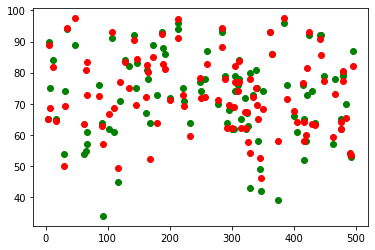

In [30]:
plt.scatter(actual_predictions['actual'].index,actual_predictions['actual'],color='green')
plt.scatter(actual_predictions['predictions'].index,actual_predictions['predictions'],color='red')

In [31]:
# feature engiineering

In [47]:
X=df[['Gre','Toefl','Cgpa','Rating','Sop','Lor','Research']]
Y=df['Chance']*100

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=1)

In [53]:
model=LinearRegression()

In [54]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
preds=model.predict(X_test)

In [56]:
model.coef_,model.intercept_

(array([ 0.18322442,  0.31739292, 11.67042917,  0.61288569,  0.30050766,
         1.44268057,  1.98897791]),
 -128.87254963488977)

In [57]:
mean_absolute_error(Y_test,preds)

4.0200193804157935

In [58]:
mean_squared_error(Y_test,preds)

34.5909889713638

In [85]:
mean_squared_error(preds,Y_test)

81.13

In [59]:
r2_score(Y_test,preds)

0.8208741703103734

In [60]:
model.score(X_test,Y_test)

0.8208741703103734

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
model=DecisionTreeRegressor()

In [63]:
model.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [64]:
preds=model.predict(X_test)

In [65]:
mean_absolute_error(Y_test,preds)

6.31

In [86]:
mean_squared_error(Y_test,preds)

81.13

In [82]:
model.score(X_test,Y_test)

0.7890688758117381

In [83]:
r2_score(Y_test,preds)

0.5798767541815546

In [84]:
r2_score(preds,Y_test)

0.5249095993090018